1. 결측치 찾기

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('../data/raw/Customer_Churn_Dataset.csv')

In [34]:
for i in df.columns:
    print("column name :",i, ", \t sum of empty column:", df[i].isin(['', ' ']).sum())

column name : customerID , 	 sum of empty column: 0
column name : gender , 	 sum of empty column: 0
column name : SeniorCitizen , 	 sum of empty column: 0
column name : Partner , 	 sum of empty column: 0
column name : Dependents , 	 sum of empty column: 0
column name : tenure , 	 sum of empty column: 0
column name : PhoneService , 	 sum of empty column: 0
column name : MultipleLines , 	 sum of empty column: 0
column name : InternetService , 	 sum of empty column: 0
column name : OnlineSecurity , 	 sum of empty column: 0
column name : OnlineBackup , 	 sum of empty column: 0
column name : DeviceProtection , 	 sum of empty column: 0
column name : TechSupport , 	 sum of empty column: 0
column name : StreamingTV , 	 sum of empty column: 0
column name : StreamingMovies , 	 sum of empty column: 0
column name : Contract , 	 sum of empty column: 0
column name : PaperlessBilling , 	 sum of empty column: 0
column name : PaymentMethod , 	 sum of empty column: 0
column name : MonthlyCharges , 	 sum

In [35]:
df[df['TotalCharges'].isin(['', ' '])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,0,No


In [39]:
df[df['tenure'] > 0].count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
numAdminTickets     7032
numTechTickets      7032
Churn               7032
dtype: int64

In [42]:
df[df['TotalCharges'] == 0].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [41]:
df.shape

(7043, 23)

In [ ]:
print(df['TotalCharges'].isin(['', ' ']).sum())
print(df['TotalCharges'].isin(['']).sum())
print(df['TotalCharges'].isin([' ']).sum())

In [ ]:
df[df['TotalCharges'].isin([' '])]

In [ ]:
pattern2 = r"^\s*$" # 공백만 있는 문자열
df['TotalCharges'].str.contains(pattern2, regex=True).sum()

2. 결측치 대체

2-1. 형변환

In [ ]:
print(df.dtypes)

In [3]:
df_missing = df.copy(deep=False)

TotalCharges를 형변환 하려고 했으나, 에러

In [5]:
# df2['TotalCharges'] = df2['TotalCharges'].astype(np.float64)
df_missing['TotalCharges'] = pd.to_numeric(df_missing['TotalCharges'])

빈 문자열 때문에 에러 발생. 형변환하면서 결측치는 'NaN'으로 표기하도록 처리

In [4]:
df_missing['TotalCharges'] = pd.to_numeric(df_missing['TotalCharges'], errors='coerce')

In [ ]:
df_missing[df_missing['TotalCharges'].isnull()]

In [ ]:
df_missing.isnull().sum()

In [ ]:
df_missing.dtypes

In [ ]:
# df_missing[df_missing['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,NaN,0,0,No


2-2. 결측치 대체

2-2-1. SimpleImputer 이용

2-2-1-1. 중앙값 대체

In [6]:
df_missing_simple1 = df_missing.copy(deep=False)

In [5]:
df_missing_simple1[df_missing_simple1['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn


In [7]:
from sklearn.impute import SimpleImputer
# SimpleImputer로 중앙값
imputer1 = SimpleImputer(strategy="median")
imputer1.fit(df_missing_simple1[['TotalCharges']])  # 결측치를 어떤 값으로 바꿀지 학습. (2차원 -> 0축 기준으로 계산)
result1 = imputer1.transform(df_missing_simple1[['TotalCharges']])  # 변환작업 (fit에서 찾은 중앙값으로 결측치를 대체)

In [8]:
df_missing_simple1['TotalCharges'] = result1

In [16]:
df_missing_simple1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

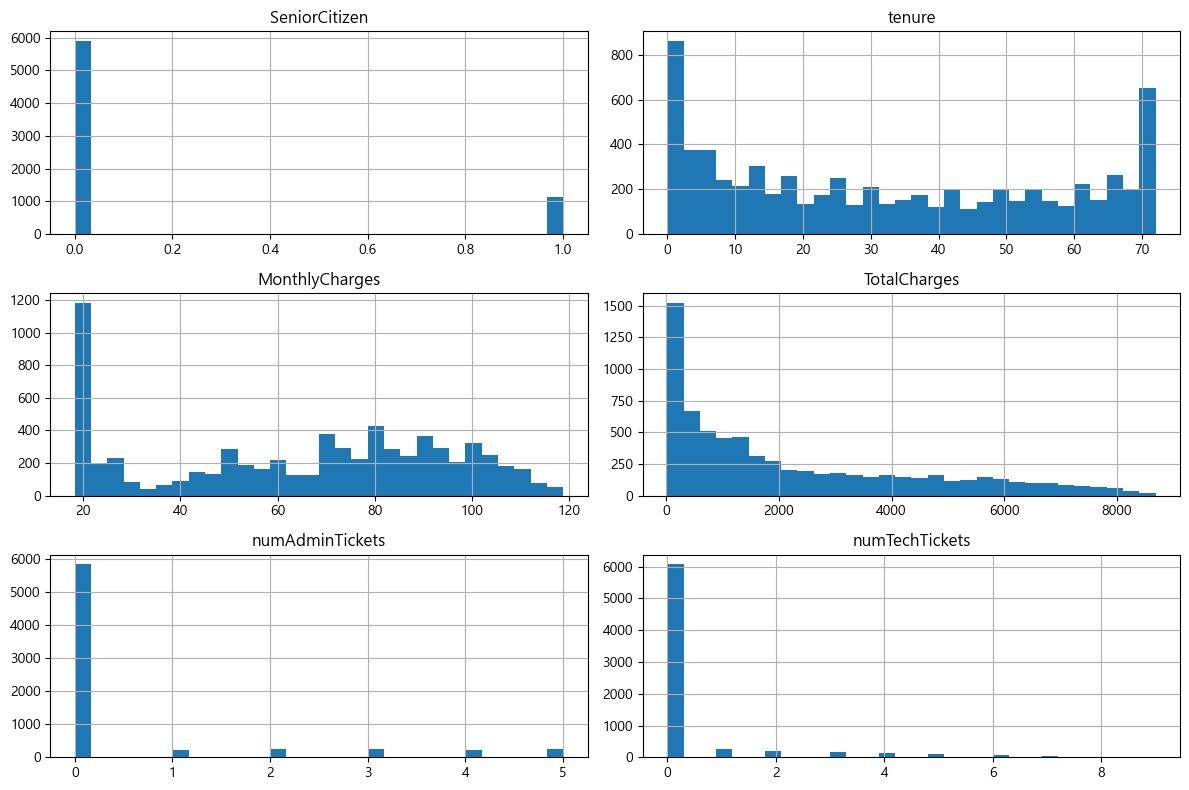

In [10]:
numeric_cols = df_missing_simple1.select_dtypes(include=['int64','float64']).columns
df_missing_simple1[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

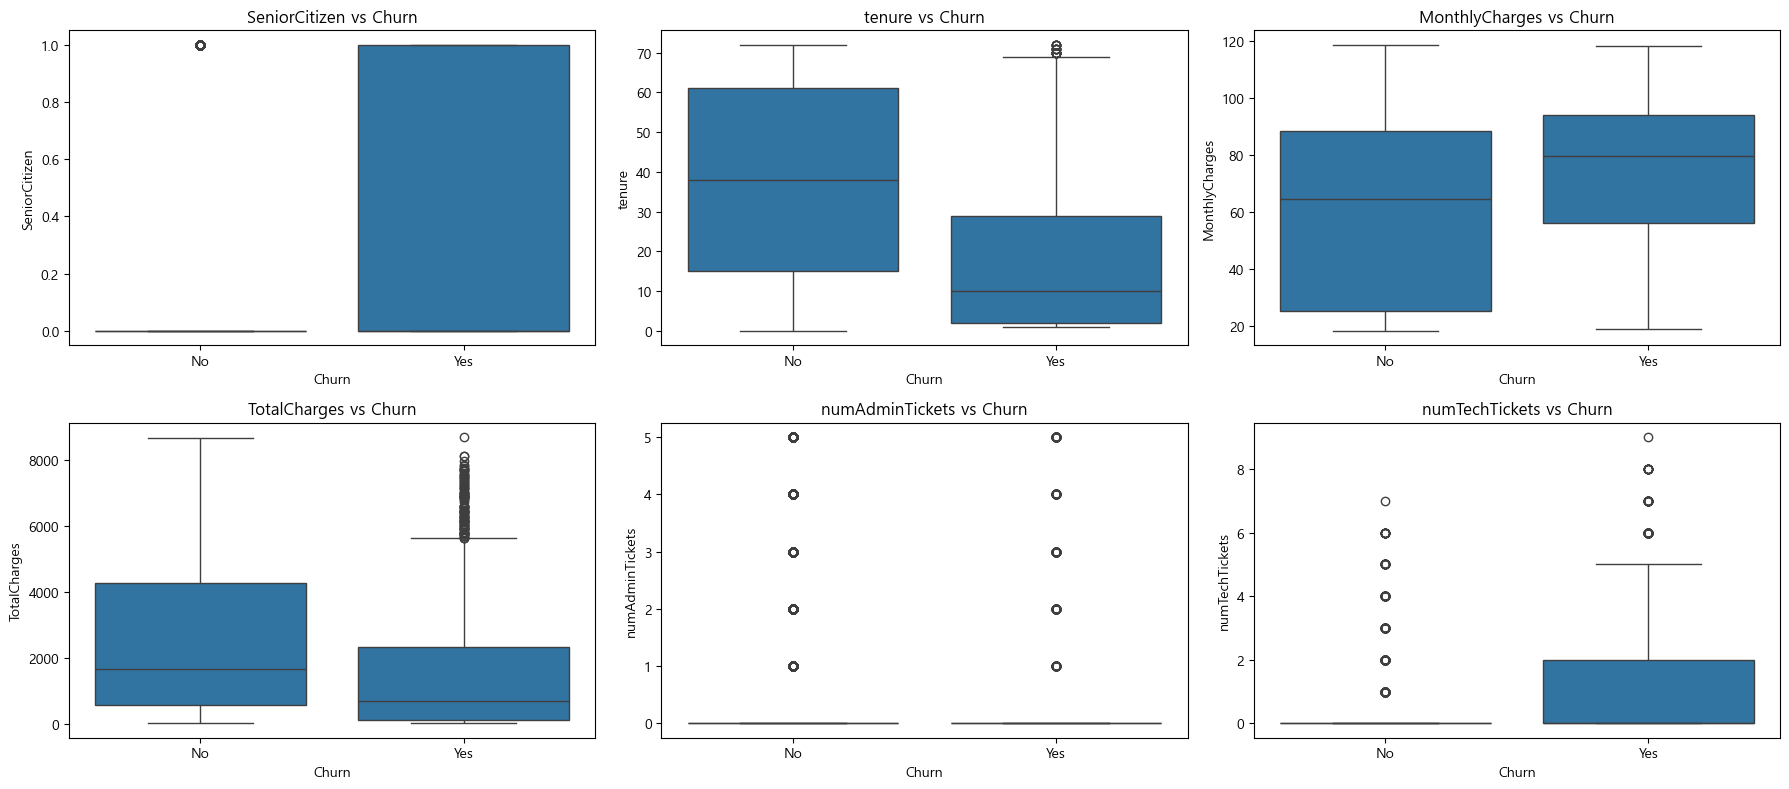

In [9]:
numeric_cols = df_missing_simple1.select_dtypes(include=['int64','float64']).columns

# Churn이 문자열이면 binary 변환 없이도 boxplot 가능함
n_cols = 3  # 한 줄에 3개씩
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_missing_simple1, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()

In [17]:
df_missing_simple1.to_csv('../data/raw/Customer_Churn_Dataset_simple_median.csv')

2-2-1-2. 최빈값 대체

In [11]:
df_missing_simple2 = df_missing.copy(deep=False)

In [12]:
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy="most_frequent")

# imputer1.fit(df_missing[['TotalCharges']])  # 결측치를 어떤 값으로 바꿀지 학습. (2차원 -> 0축 기준으로 계산)
# result1 = imputer1.transform(df[['A', 'B']])  # 변환작업 (fit에서 찾은 중앙값으로 결측치를 대체)
result2 = imputer2.fit_transform(df_missing_simple2['TotalCharges'].to_frame()) #series.to_frame() : Series->DataFrame

In [13]:
df_missing_simple2['TotalCharges'] = result2

In [12]:
df_missing_simple2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

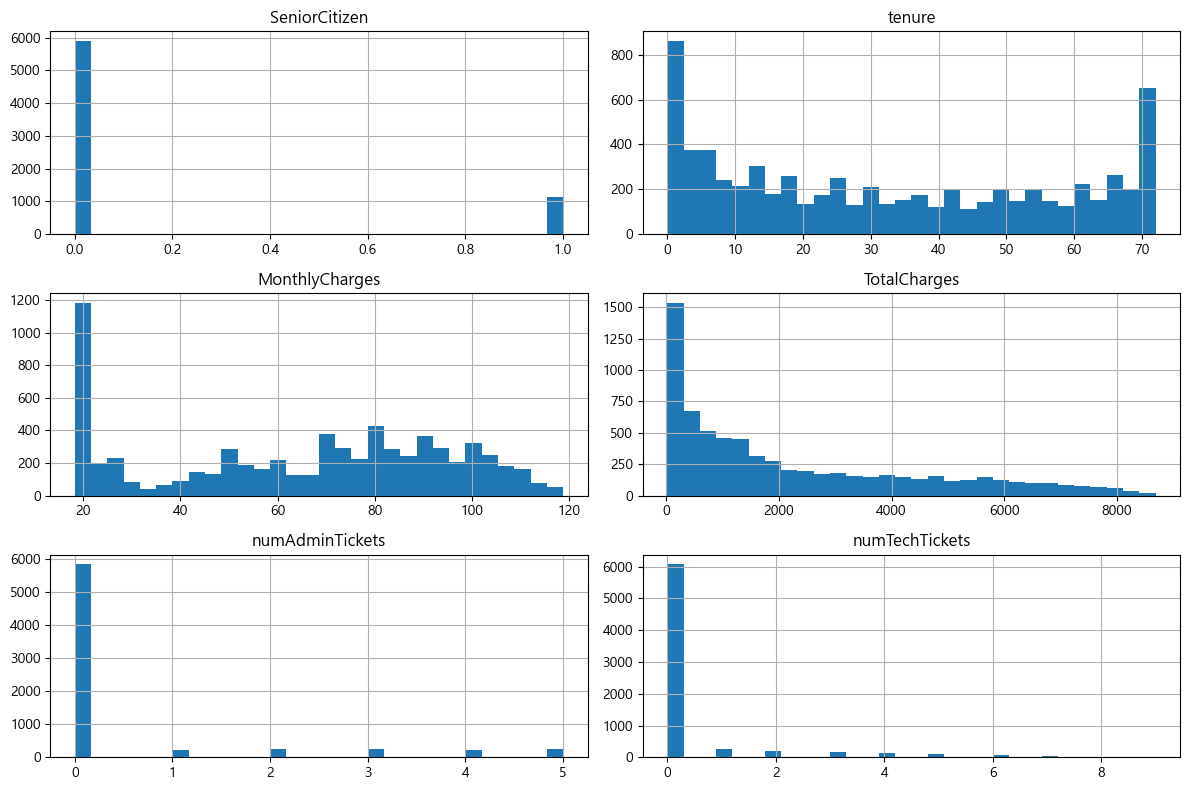

In [14]:
numeric_cols = df_missing_simple2.select_dtypes(include=['int64','float64']).columns
df_missing_simple2[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

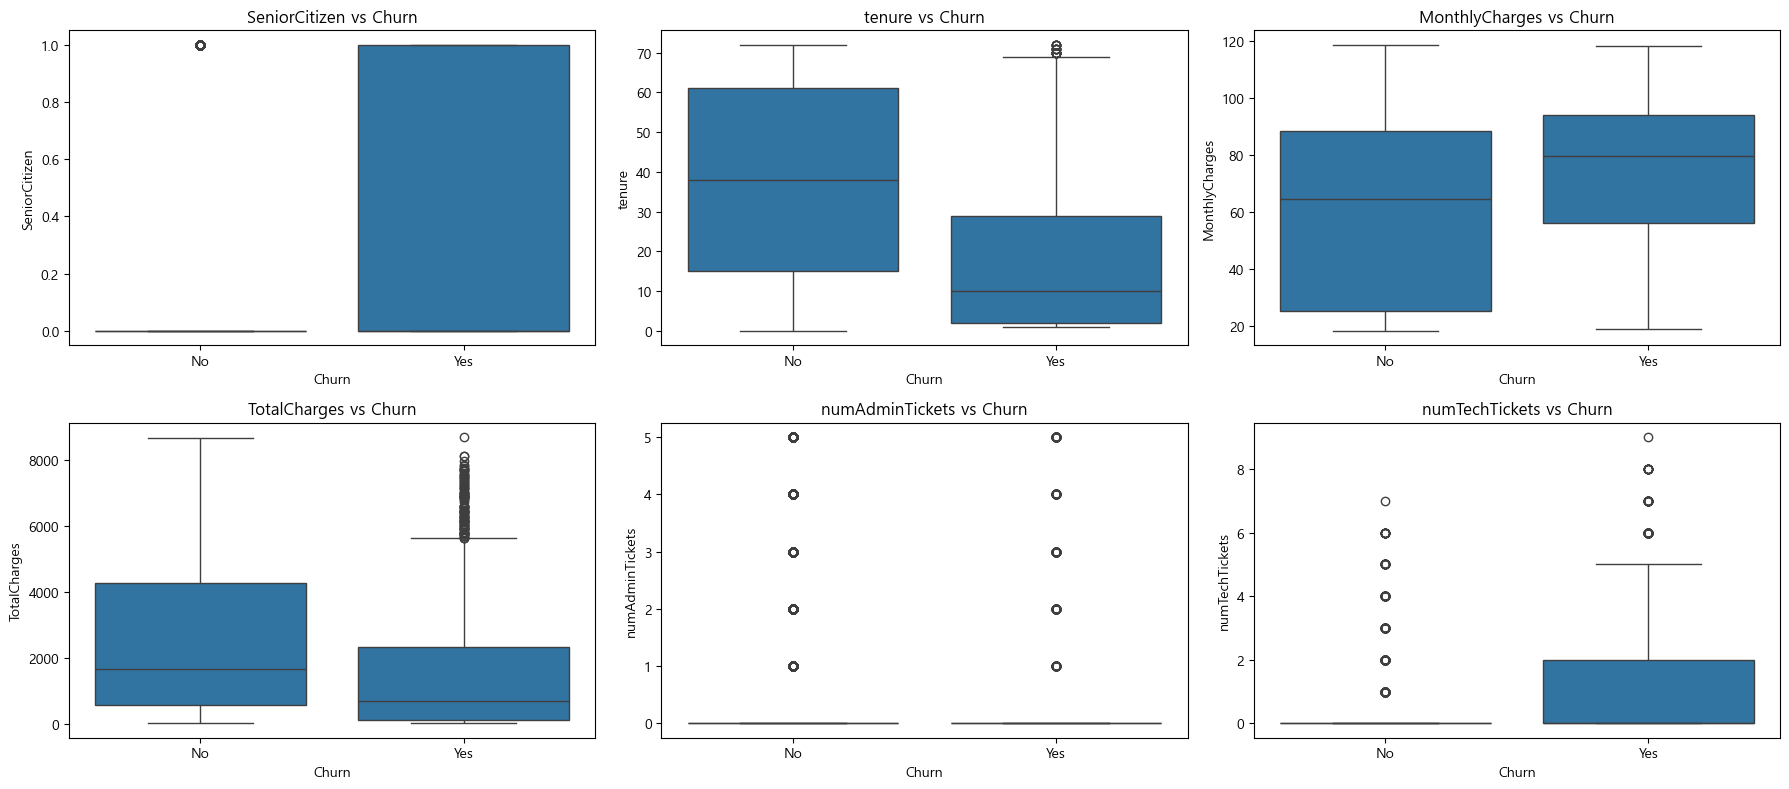

In [ ]:
# numeric_cols = df_missing_simple2.select_dtypes(include=['int64','float64']).columns

# Churn이 문자열이면 binary 변환 없이도 boxplot 가능함
n_cols = 3  # 한 줄에 3개씩
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_missing_simple2, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()

In [22]:
df_missing_simple2.to_csv('../data/raw/Customer_Churn_Dataset_simple_frequent.csv')

2-2-2. KNN 이용

In [15]:
df_missing_knn = df_missing.copy(deep=False)

In [16]:
from sklearn.impute import KNNImputer
# 2. KNNImputer 객체 생성 및 설정
# n_neighbors 파라미터로 사용할 이웃의 수를 지정합니다 (기본값은 5)
imputer = KNNImputer(n_neighbors=5) # 예시로 2개의 이웃 사용

# 3. 데이터에 imputer 적용 (fit_transform)
# 결측값이 채워진 numpy 배열 반환
imputed_data = imputer.fit_transform(df_missing_knn['TotalCharges'].to_frame())

df_missing_knn['TotalCharges'] = imputed_data

In [30]:
df_missing_knn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

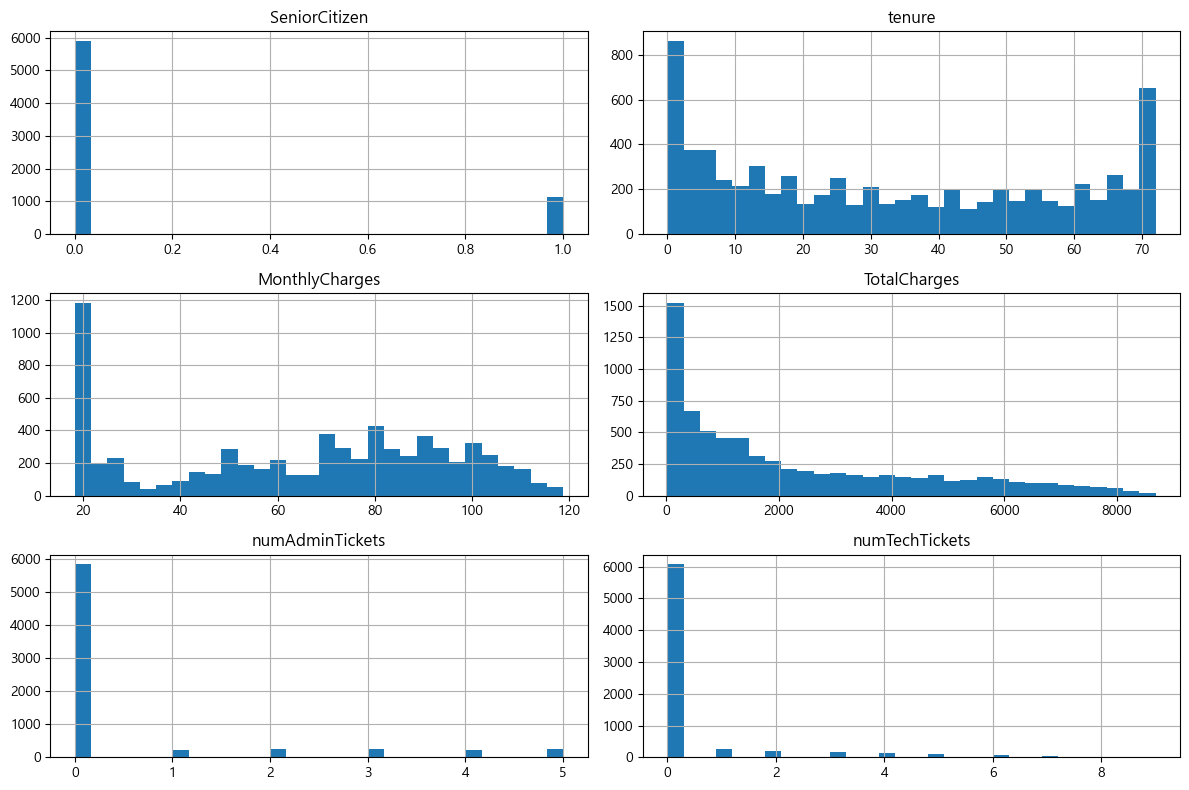

In [17]:
numeric_cols = df_missing_knn.select_dtypes(include=['int64','float64']).columns
df_missing_knn[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

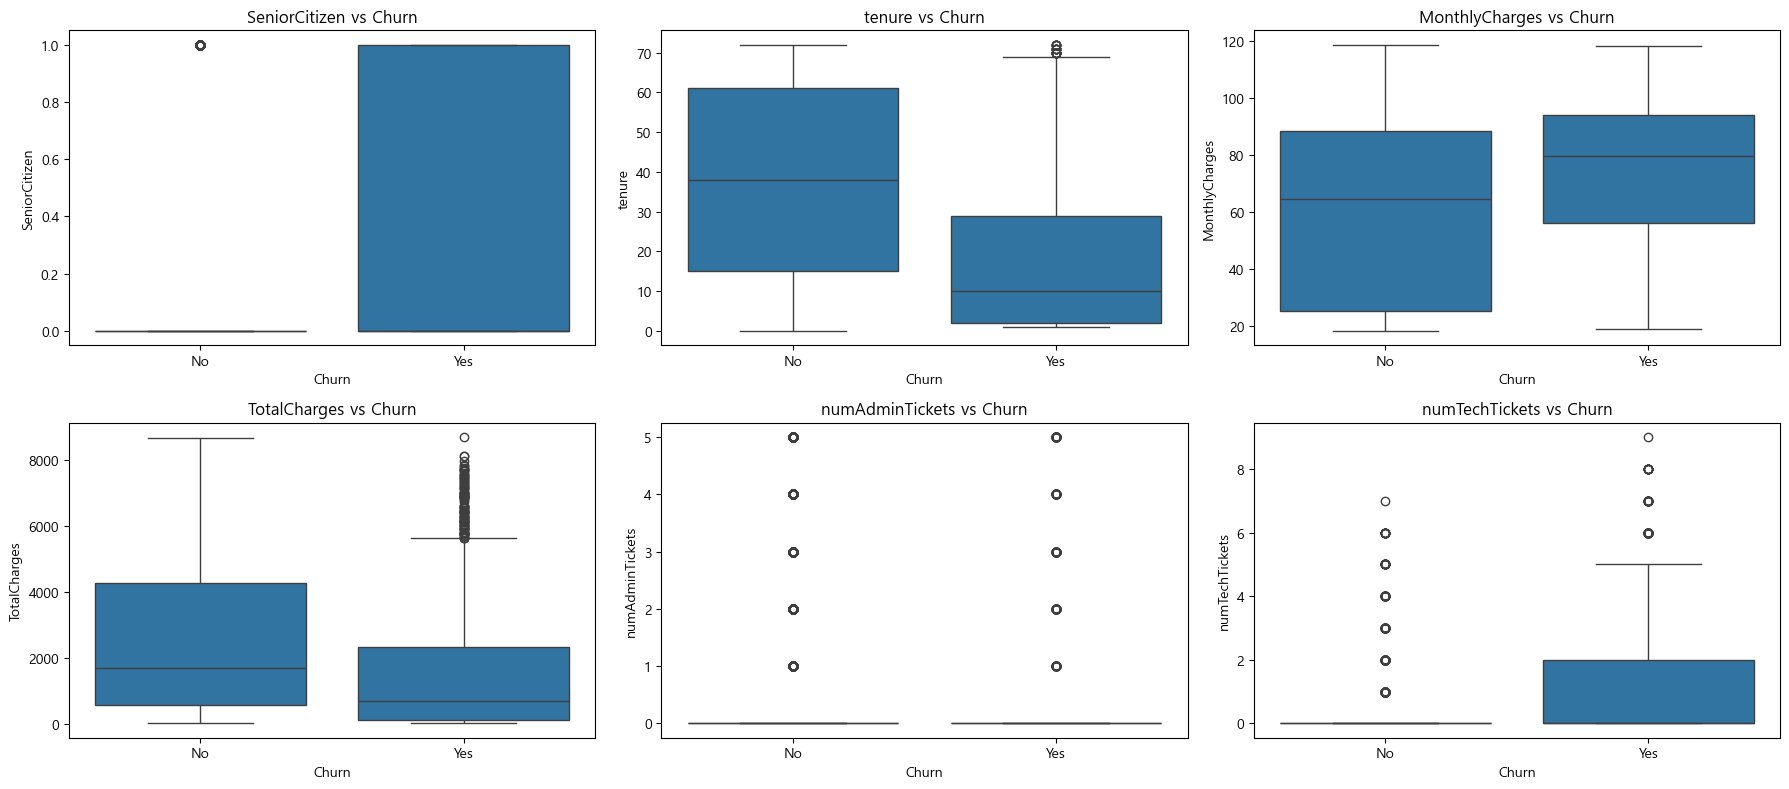

In [18]:
# numeric_cols = df_missing_knn.select_dtypes(include=['int64','float64']).columns

# Churn이 문자열이면 binary 변환 없이도 boxplot 가능함
n_cols = 3  # 한 줄에 3개씩
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_missing_knn, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()

In [31]:
df_missing_knn.to_csv('../data/raw/Customer_Churn_Dataset_knn.csv')

2-2-3. 결측치를 0으로 대체

In [19]:
df_missing_0 = df_missing.copy(deep=False)

In [20]:
df_missing_0['TotalCharges'] = df_missing_0['TotalCharges'].fillna(0.0)

In [49]:
df_missing_0.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

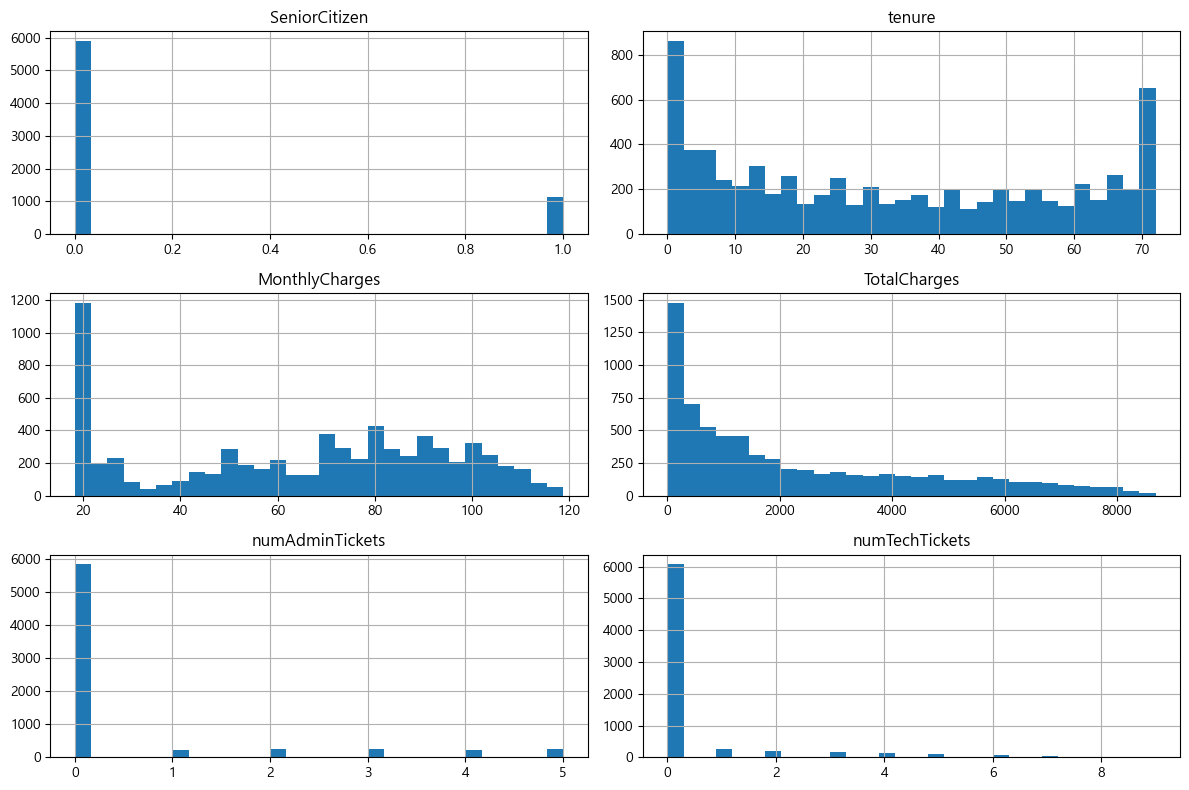

In [21]:
numeric_cols = df_missing_0.select_dtypes(include=['int64','float64']).columns
df_missing_0[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

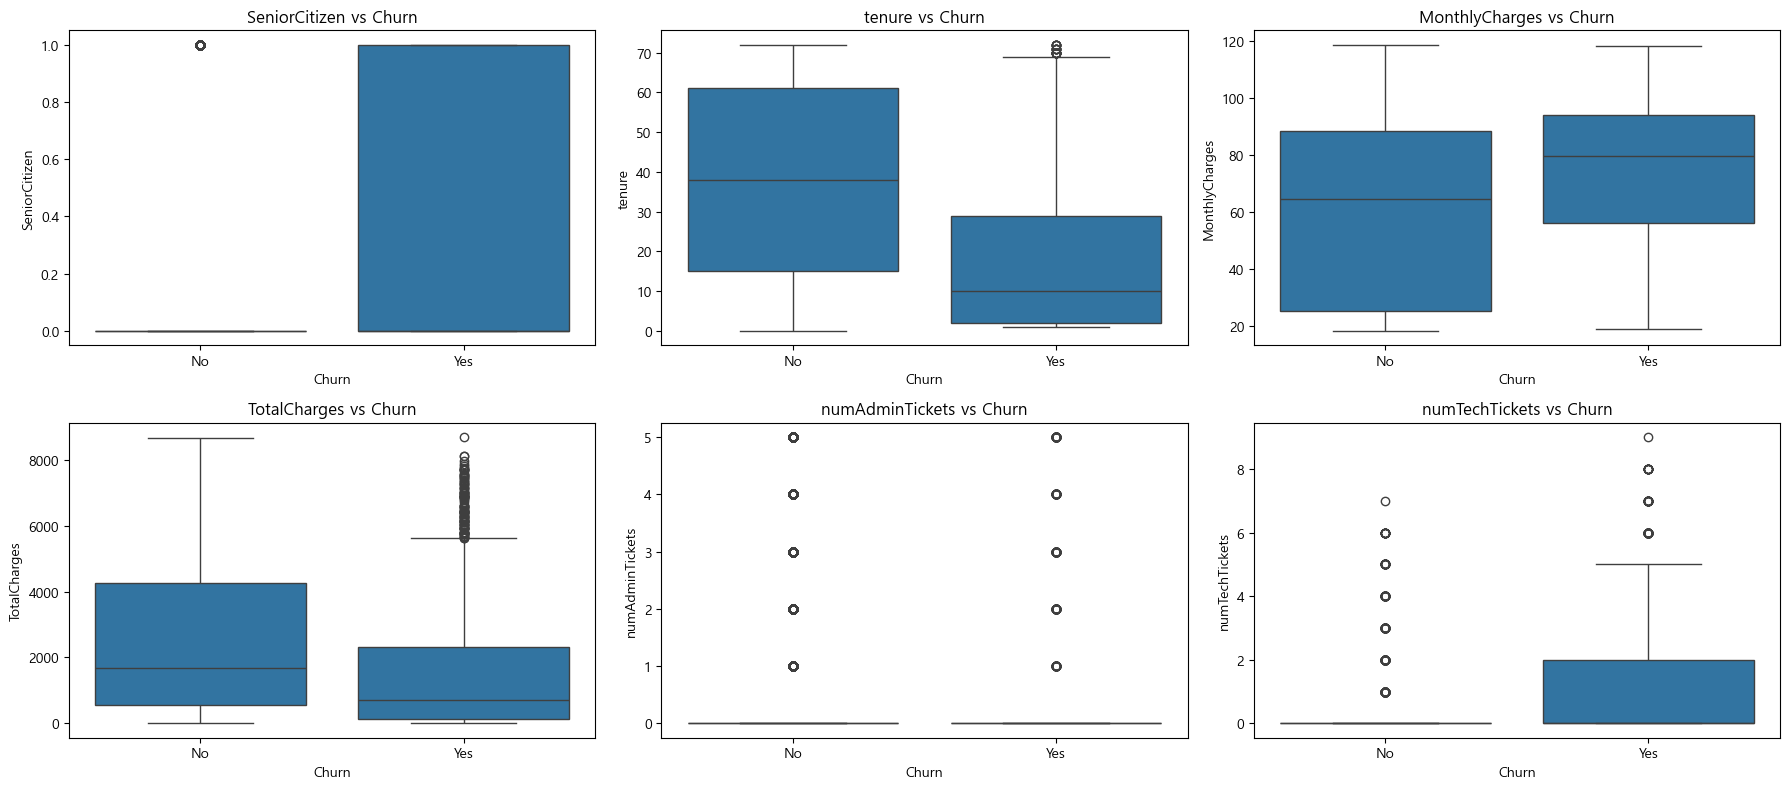

In [ ]:
# numeric_cols = df_missing_0.select_dtypes(include=['int64','float64']).columns

# Churn이 문자열이면 binary 변환 없이도 boxplot 가능함
n_cols = 3  # 한 줄에 3개씩
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_missing_0, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()

In [50]:
df_missing_0.to_csv('../data/raw/Customer_Churn_Dataset_0_impute.csv')